<a href="https://colab.research.google.com/github/Jose-Bruno/VisualizacaoComputacional/blob/main/Jos%C3%A9_Bruno_da_Silva_Santos_Visualiza%C3%A7%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import matplotlib.pyplot as plt


In [103]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dados/dadosabertos (3).csv', encoding='latin-1', sep=';')

In [104]:
dados = dados.rename(columns={'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)': 'CLASSIFICAÇÃO'})
dados = dados.rename(columns={'Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?': 'Situação do paciente confirmado'})
dados = dados.rename(columns={'Data do Óbito (Caso haja)': 'Data do Óbito'})

In [105]:
dados.head(30)

,Unnamed: 0,Data de atendimento no Serviço,IDADE,SEXO,MUNICÍPIO DE RESIDÊNCIA,CLASSIFICAÇÃO,Comorbidades,Situação do paciente confirmado,Data do Óbito,Data de Confirmação do Exame
0,0,26/03/2020,1,F,MACEIÓ,CONFIRMADO,SEM COMORBIDADE,RECUPERADO,NaN,13/04/2020
1,1,23/03/2020,38,M,MACEIÓ,CONFIRMADO,DOENÇA PULMONAR CRÔNICA,RECUPERADO,NaN,14/04/2020
2,2,06/04/2020,35,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
3,3,11/04/2020,57,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
4,4,27/04/2020,60,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
5,5,04/03/2020,42,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,08/03/2020
6,6,14/03/2020,21,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
7,7,14/03/2020,25,F,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
8,8,14/03/2020,44,F,MACEIÓ,CONFIRMADO,HAS,RECUPERADO,NaN,18/03/2020
9,9,16/03/2020,38,M,MACEIÓ,CONFIRMADO,ASMA,RECUPERADO,NaN,19/03/2020


In [106]:
casos_confirmados_homens = len(dados[(dados['SEXO'] == 'M') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
casos_confirmados_mulheres = len(dados[(dados['SEXO'] == 'F') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

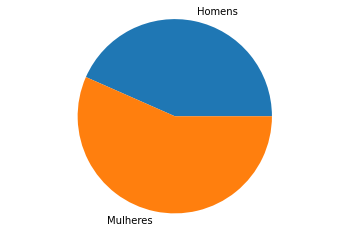

In [107]:
valores = [casos_confirmados_homens, casos_confirmados_mulheres]
legenda = ["Homens", "Mulheres"]
plt.pie(valores, labels=legenda)
plt.axis('equal')
plt.show()